In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress

In [20]:
population_data_to_load = 'raw data files/Clean Data/2018_populations.csv'
summer_edited_load = 'raw data files/Clean Data/summer_edited.csv'
winter_edited_load = 'raw data files/Clean Data/winter_edited.csv'
athlete_data_to_load = 'raw data files/Olympic data/athlete_events.csv'


population_data = pd.read_csv(population_data_to_load)
summer_edited = pd.read_csv(summer_edited_load)
winter_edited = pd.read_csv(winter_edited_load)
athlete_data = pd.read_csv(athlete_data_to_load)

athlete_data_grouped = athlete_data.groupby('Team')
athlete_data_grouped.count().sort_values(by = 'Name', ascending = False).head(10)

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
Team,,,,,,,,,,,,,,
United States,17847,17847,17847,17610,14295,13791,17847,17847,17847,17847,17847,17847,17847,5219
France,11988,11988,11988,10877,8096,7853,11988,11988,11988,11988,11988,11988,11988,1550
Great Britain,11404,11404,11404,10731,7667,7574,11404,11404,11404,11404,11404,11404,11404,1673
Italy,10260,10260,10260,9922,7772,7462,10260,10260,10260,10260,10260,10260,10260,1527
Germany,9326,9326,9326,9180,7092,7032,9326,9326,9326,9326,9326,9326,9326,1984
Canada,9279,9279,9279,9108,7825,7709,9279,9279,9279,9279,9279,9279,9279,1243
Japan,8289,8289,8289,8173,7408,7348,8289,8289,8289,8289,8289,8289,8289,911
Sweden,8052,8052,8052,8048,5373,5277,8052,8052,8052,8052,8052,8052,8052,1434
Australia,7513,7513,7513,7405,6629,6527,7513,7513,7513,7513,7513,7513,7513,1306


In [4]:
winter_edited = winter_edited.rename(columns= {"Grand Total": "Weighted Total"})
population_data = population_data.rename(columns= {"Country (code)": "Country Code"})
population_data["Population (2018)"] = population_data["Population (2018)"].div(1000000)

In [5]:
medals_merged = pd.merge(winter_edited, summer_edited, on="Country Code")

In [6]:
medals_merged["Combined Total"] = medals_merged["Weighted Total_x"] + medals_merged["Weighted Total_y"]

In [7]:
medals_merged = medals_merged.rename(columns= {"Weighted Total_x": "Winter Total", "Weighted Total_y": "Summer Total"})

In [8]:
medals_population_merged = pd.merge(medals_merged, population_data, on="Country Code")
medals_population_merged.head(10)

,Country Code,Winter Total,Summer Total,Combined Total,Population (2018)
0,AUS,28,1966,1994,24.992369
1,AUT,447,87,534,8.847037
2,BEL,1,93,94,11.422068
3,BLR,31,184,215,9.485386
4,CAN,1193,707,1900,37.058856
5,CHN,144,1683,1827,1392.730000
6,CZE,143,106,249,10.625695
7,ESP,4,793,797,46.723749
8,EST,17,24,41,1.320884
9,FIN,575,159,734,5.518050


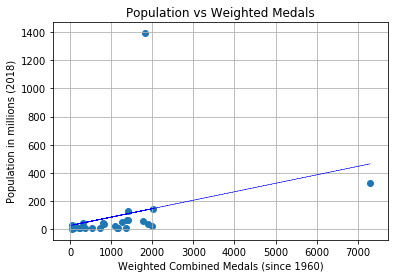

In [9]:
#Plot of combined medals and population 

(slope, intercept, _, _, _) = linregress(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"])
fit = slope *  medals_population_merged["Combined Total"] + intercept

plt.title("Population vs Weighted Medals")
plt.xlabel("Weighted Combined Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()

plt.plot(medals_population_merged["Combined Total"], fit, 'b--', linewidth = 0.5)
plt.scatter(medals_population_merged["Combined Total"], medals_population_merged["Population (2018)"])
plt.show()

In [10]:
medals_population_merged.describe()

,Winter Total,Summer Total,Combined Total,Population (2018)
count,28.000000,28.000000,28.000000,28.000000
mean,235.607143,890.250000,1125.857143,93.103463
std,330.778469,1216.470201,1383.144799,262.955104
min,1.000000,24.000000,38.000000,1.320884
25%,9.250000,104.000000,240.500000,9.697935
50%,56.500000,604.000000,958.500000,25.271094
75%,366.750000,1288.500000,1401.500000,53.834263
max,1193.000000,6311.000000,7301.000000,1392.730000


In [11]:
medals_population_summer = pd.merge(summer_edited, population_data, on="Country Code")


In [12]:
medals_population_summer.head(10)

,Country Code,Weighted Total,Population (2018)
0,MAR,39,36.029138
1,AFG,2,37.172386
2,ARG,333,44.494502
3,ARM,15,2.951776
4,AUS,1966,24.992369
5,AUT,87,8.847037
6,AZE,43,9.942334
7,BDI,3,11.175378
8,BEL,93,11.422068
9,BLR,184,9.485386


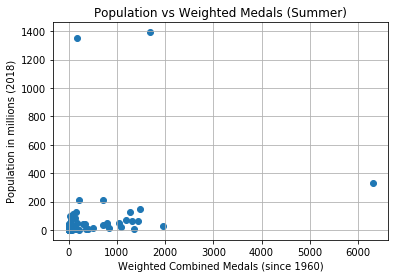

In [13]:
# Plot of Summer Medals vs Population 

(slope, intercept, _, _, _) = linregress(medals_population_summer["Weighted Total"], medals_population_summer["Population (2018)"])
fit_summer = slope *  medals_population_summer["Weighted Total"] + intercept

plt.scatter(medals_population_summer["Weighted Total"], medals_population_summer["Population (2018)"])

plt.plot(medals_population_summer["Weighted Total"], fit_summer, linewidth = 1)

plt.title("Population vs Weighted Medals (Summer)")
plt.xlabel("Weighted Combined Medals (since 1960)")
plt.ylabel("Population in millions (2018)")
plt.grid()

plt.show()

In [14]:
medals_population_summer.describe()

,Weighted Total,Population (2018)
count,84.000000,83.000000
mean,342.023810,66.588406
std,805.745213,213.252113
min,1.000000,0.170499
25%,7.500000,4.869503
50%,38.500000,11.565204
75%,240.750000,43.608821
max,6311.000000,1392.730000


In [15]:
# USA Medals over time as population grows 

yearly_usa_population = 'raw data files/Clean Data/USA_pop_yearly.csv'
yearly_usa_pop = pd.read_csv(yearly_usa_population)
yearly_usa_pop.head()


,Year,Population
0,1960,180671000
1,1961,183691000
2,1962,186538000
3,1963,189242000
4,1964,191889000


In [55]:
usa_medals_pop = pd.merge(yearly_usa_pop, athlete_data, on="Year")
usa_medals_pop.head()

,Year,Population,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1960,180671000,24,Nils Egil Aaness,M,24.0,NaN,NaN,Norway,NOR,1960 Winter,Winter,Squaw Valley,Speed Skating,Speed Skating Men's 500 metres,NaN
1,1960,180671000,24,Nils Egil Aaness,M,24.0,NaN,NaN,Norway,NOR,1960 Winter,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
2,1960,180671000,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold
3,1960,180671000,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 5,000 metres",NaN
4,1960,180671000,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 10,000 metres",NaN


In [59]:
usa_medals_pop = usa_medals_pop.loc[usa_medals_pop['NOC']=='USA']
usa_medals_pop = usa_medals_pop.loc[usa_medals_pop['Medal']=='Gold']
#usa_medals_pop = usa_medals_pop.loc[usa_medals_pop['Medal']=='Silver']
#usa_medals_pop = usa_medals_pop.loc[usa_medals_pop['Medal']=='Bronze']


usa_medals_pop.head(100)

,Year,Population,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
308,1960,180671000,5212,Jay Joseph Hoyland Arnette,M,21.0,188.0,79.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold
390,1960,180671000,6270,"Arthur DeLancey ""Dan"" Ayrault, Jr.",M,25.0,193.0,86.0,United States,USA,1960 Summer,Summer,Roma,Rowing,Rowing Men's Coxless Fours,Gold
650,1960,180671000,9670,"Walter Jones ""Walt"" Bellamy, Jr.",M,23.0,211.0,98.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold
729,1960,180671000,10157,"Robert Earl ""Bob"" Bennett",M,17.0,183.0,78.0,United States,USA,1960 Summer,Summer,Roma,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
862,1960,180671000,12269,"Richard Adolph ""Dick"" Blick",M,20.0,195.0,87.0,United States,USA,1960 Summer,Summer,Roma,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
867,1960,180671000,12377,"Douglas Morlan ""Doug"" Blubaugh",M,25.0,170.0,73.0,United States,USA,1960 Summer,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Freestyle",Gold
939,1960,180671000,13371,"Robert Lewis ""Bob"" Boozer",M,23.0,203.0,99.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold
965,1960,180671000,13797,Ralph Harold Boston,M,21.0,187.0,74.0,United States,USA,1960 Summer,Summer,Roma,Athletics,Athletics Men's Long Jump,Gold
972,1960,180671000,13854,"Molly Ray Botkin (-Rossiter, -Trees)",F,16.0,173.0,61.0,United States,USA,1960 Summer,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold
995,1960,180671000,14544,"Donald George ""Don"" Bragg",M,25.0,190.0,89.0,United States,USA,1960 Summer,Summer,Roma,Athletics,Athletics Men's Pole Vault,Gold


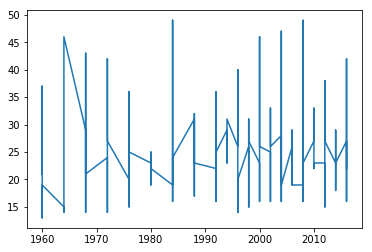

In [62]:
plt.plot(usa_medals_pop["Year"], usa_medals_pop["Age"])